IMPORTING LIBRARIES

In [35]:
##Libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score,RandomizedSearchCV,GridSearchCV
import seaborn as sns
from scipy import stats
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from hyperopt import space_eval,tpe,STATUS_OK,fmin,hp,Trials
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

LOADING DATASET

In [36]:
#Mounting my google drive
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [37]:
#Loading the dataset


#Excel file into a pandas DataFrame
dataset = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Machine learning assignment/Dry_Bean_Dataset.xlsx')

#first 5 rows of the DataFrame
dataset.info() 

#Dataset description
  #17 attributes
  #13611 instances
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [38]:
dataset.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

DATA PREPROCESSING

In [39]:
#DATA CLEANING

#Checking for missing values
print(dataset.isnull().sum()) #No missing values
#Checking for duplicated rows
print('Number of duplicated rows:', dataset.duplicated().sum()) #68 duplicated rows
#Removing duplicated rows
clean_data1 = dataset.drop_duplicates()
len(clean_data1) #Final number of instances: 13543

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64
Number of duplicated rows: 68


13543

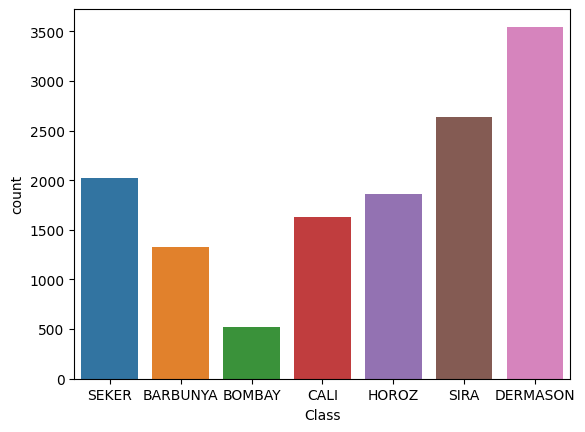

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


In [40]:
#EXPLORATORY DATA ANALYSIS

#Visualising the distribution of each class
sns.countplot(x="Class", data=clean_data1)
plt.show() #Bombay bean had the smallest number of instances.
print(clean_data1['Class'].value_counts()) #Counting exact number of instances for each class.
#Plot shows highly imbalanced dataset. Needs to be fixed to ensure ML algorithm isn't biased towards the majority class

SEKER       3546
BARBUNYA    3546
BOMBAY      3546
CALI        3546
HOROZ       3546
SIRA        3546
DERMASON    3546
Name: Class, dtype: int64


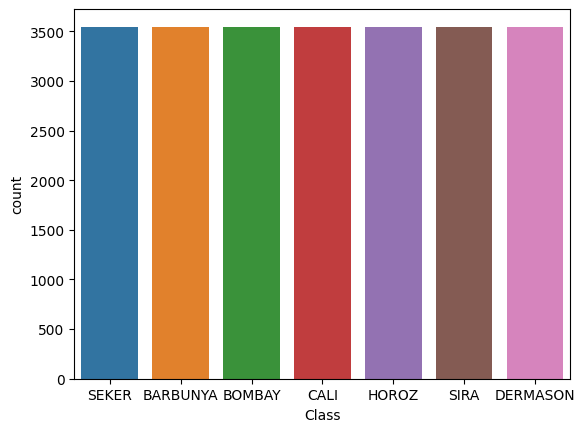

In [41]:
#Balancing out class distribution using oversampling techniques for minority class: SMOTE (oversampling) --> avoids bias by increasing representation of Bombay class
#SMOTE = synthetic minority oversampling technique
#Disadvantage of SMOTE - risk of data overfitting, Computational complexity, 

# Separating features from class variable
X = clean_data1.drop('Class', axis=1)
y = clean_data1['Class']

#SMOTE
smote = SMOTE(random_state=260744) #Ensures randomisation is the same when re-run

X_new, y_new = smote.fit_resample(X, y)

# Combine the resampled features and target variable into a new DataFrame
clean_data2 = pd.concat([pd.DataFrame(X_new), pd.DataFrame(y_new)], axis=1)
clean_data2.columns = clean_data1.columns
sns.countplot(x="Class", data=clean_data2)
print(clean_data2['Class'].value_counts())

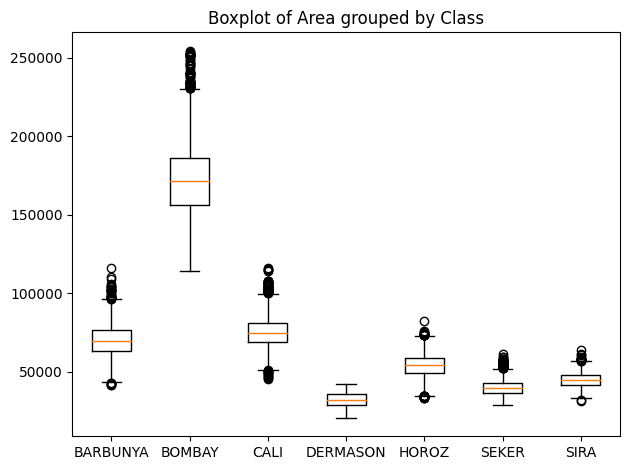

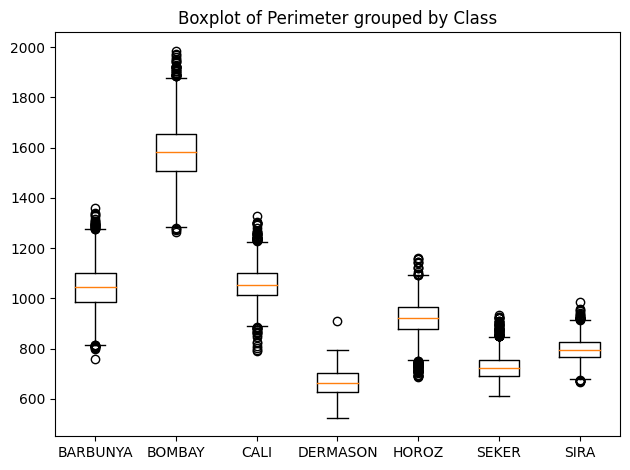

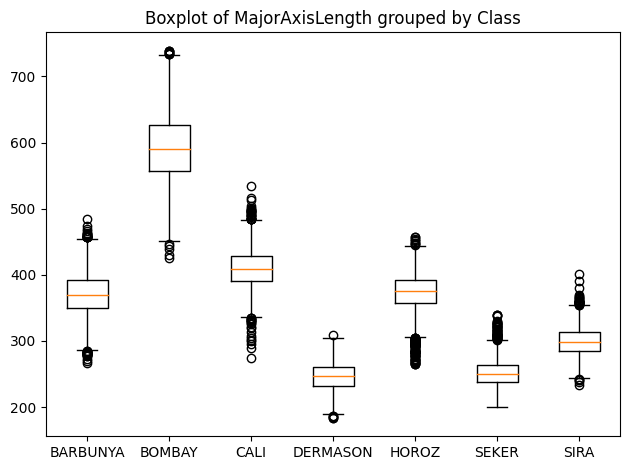

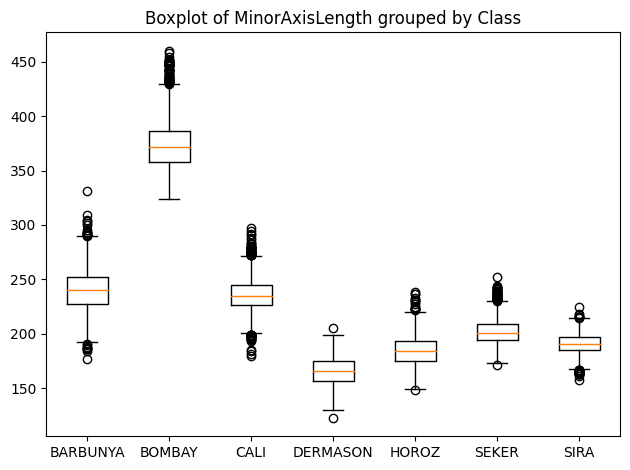

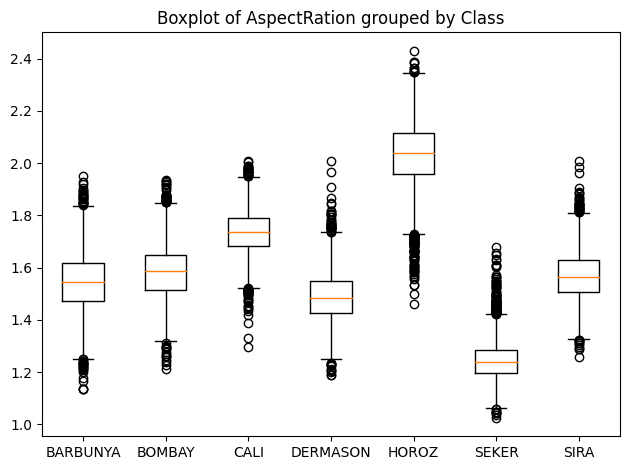

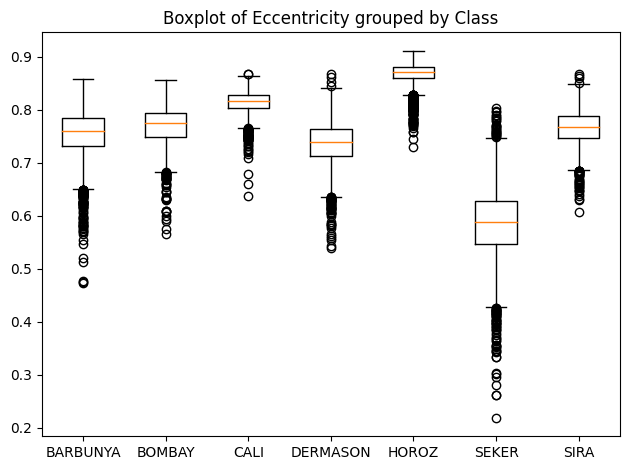

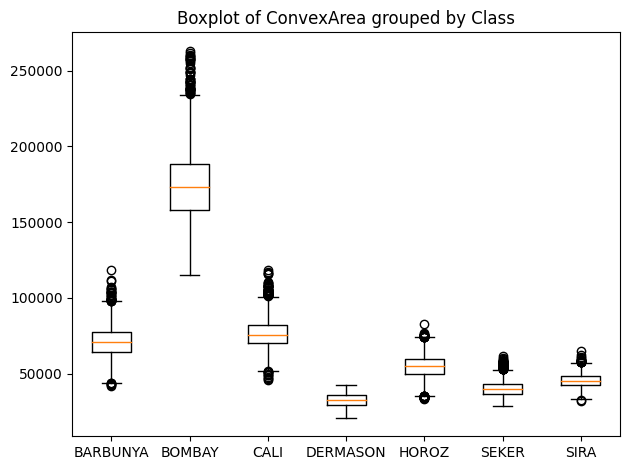

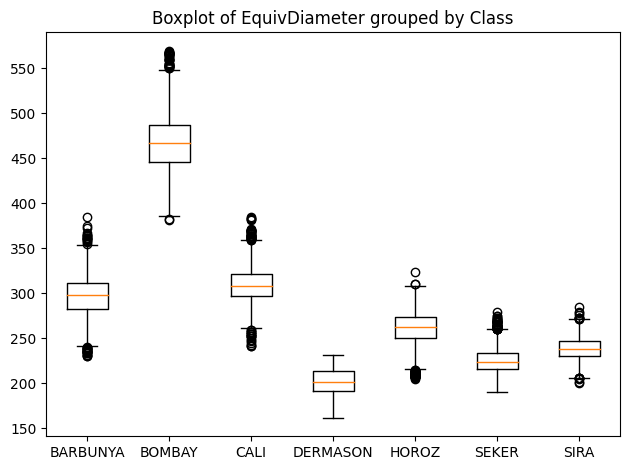

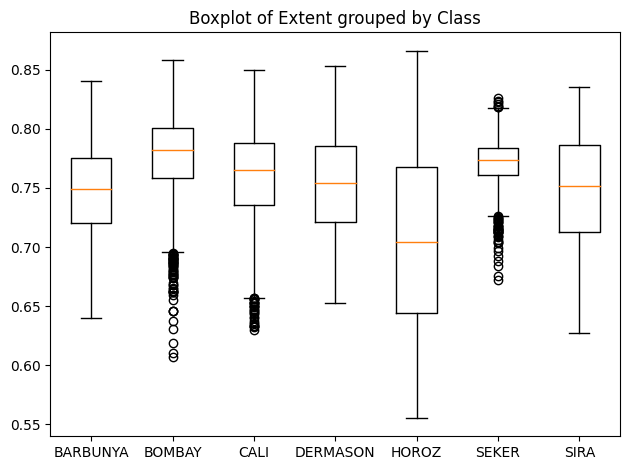

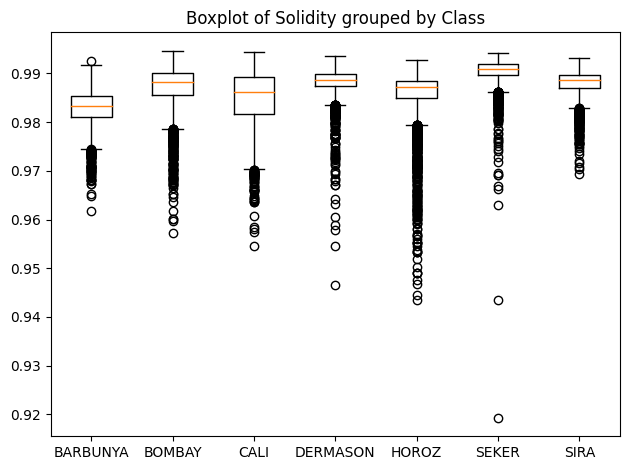

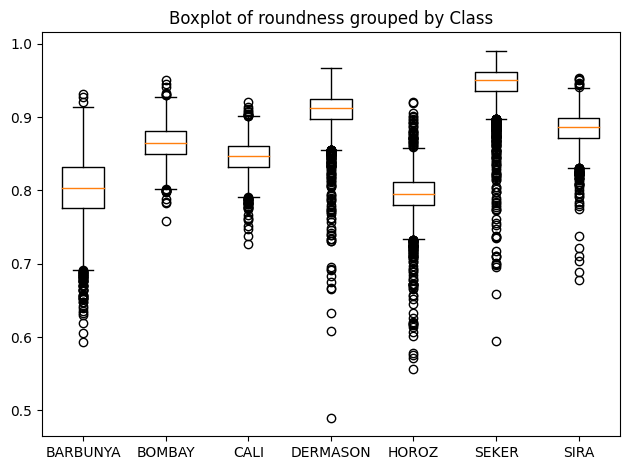

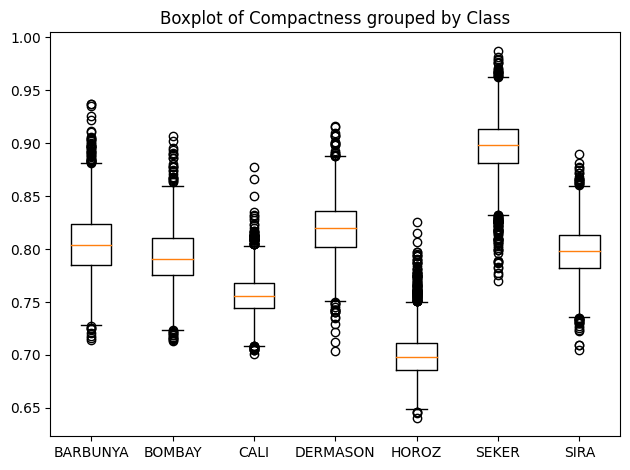

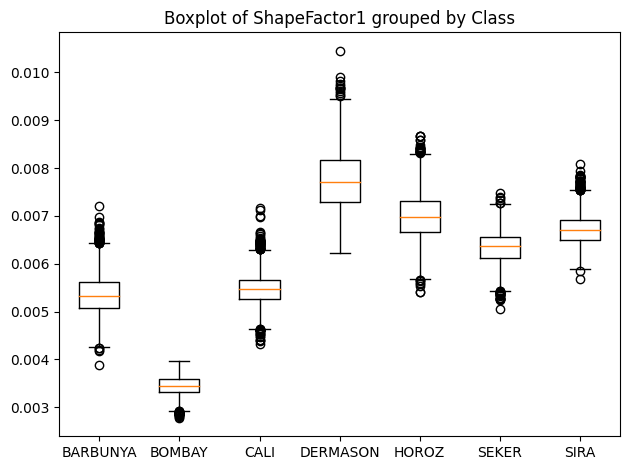

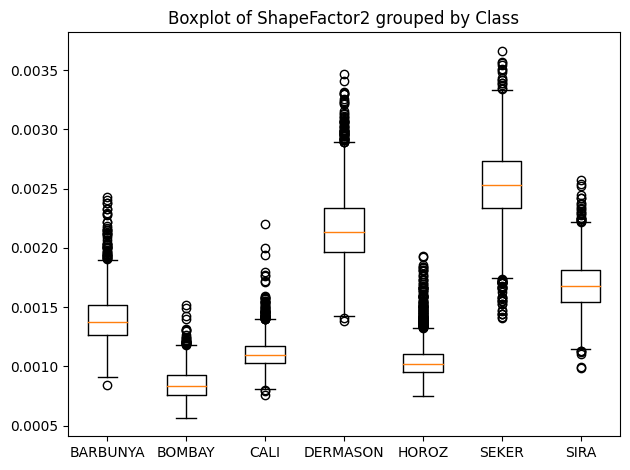

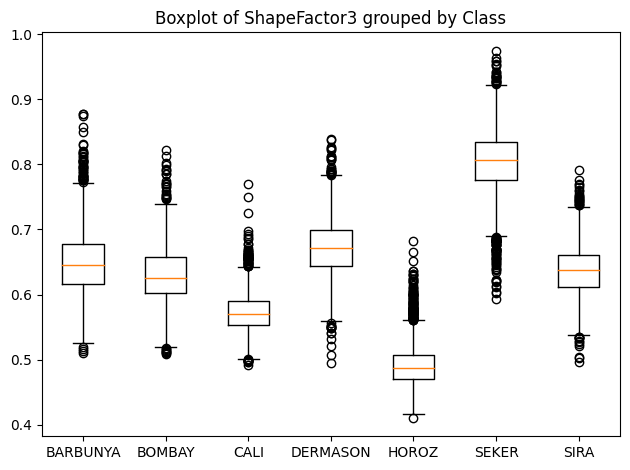

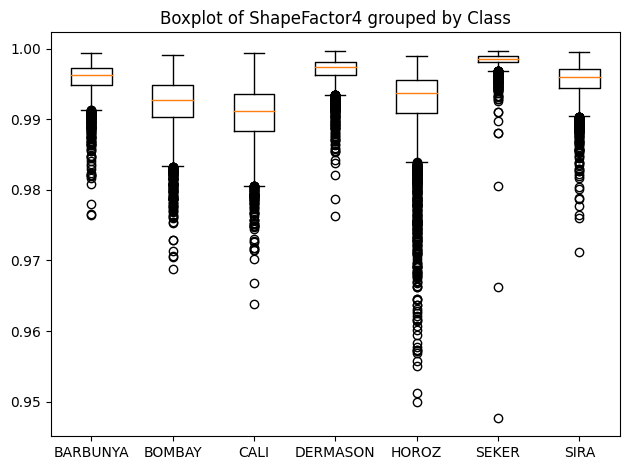

In [42]:
#BOXPLOT TO SHOW DISTRIBUTION OF OUR FEATURES TO DETERMINE IF DATA NEEDS TO BE NORMALISED.

#Grouping data by class
grouped_class = clean_data2.groupby('Class')

# Iterate over each feature column and create a boxplot for each class
for feature in clean_data2.columns[:-1]:
    fig, ax = plt.subplots()
    ax.boxplot([group[feature] for name, group in grouped_class])
    ax.set_xticklabels(grouped_class.groups.keys())
    ax.set_title(f'Boxplot of {feature} grouped by Class')
    plt.tight_layout()

#Shows that each feature has differential range of values. We may need to normalise feature values later.

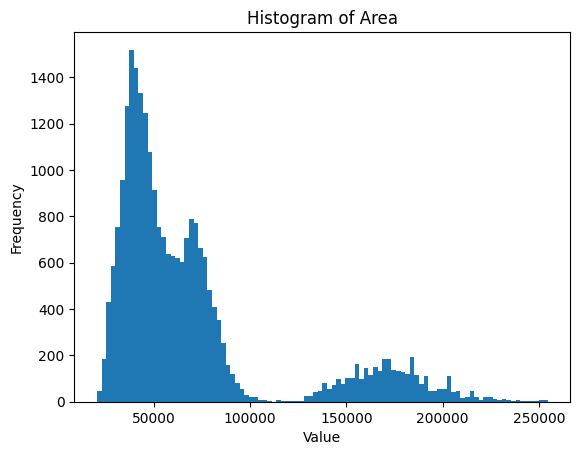

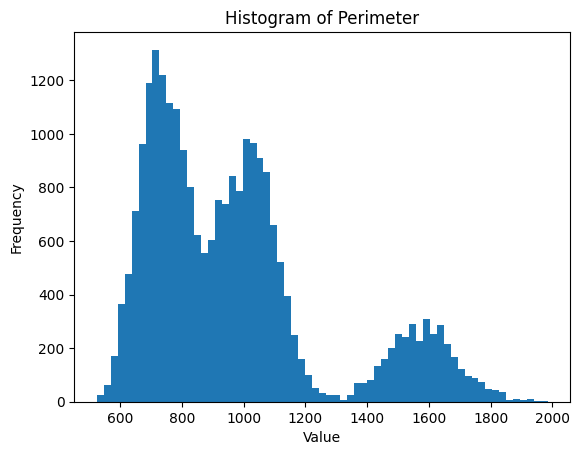

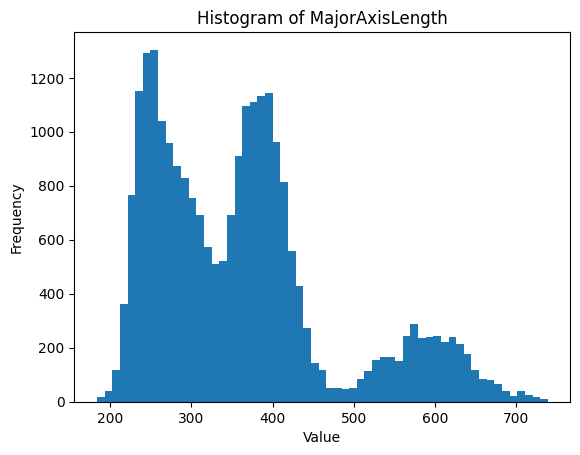

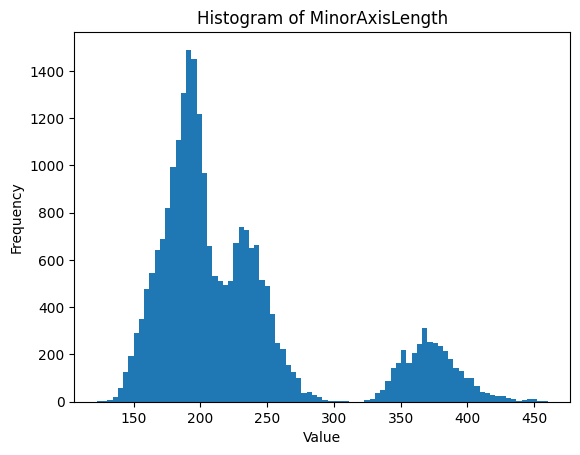

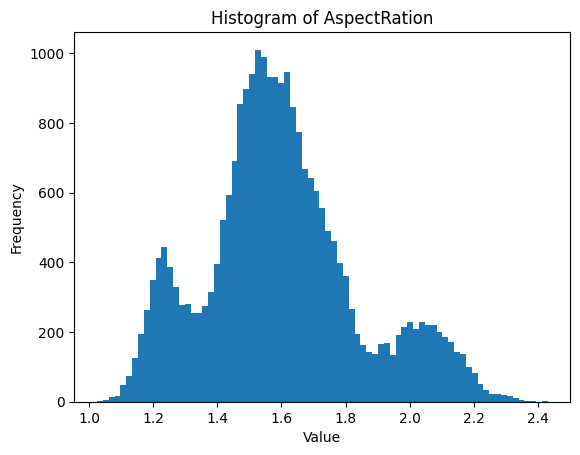

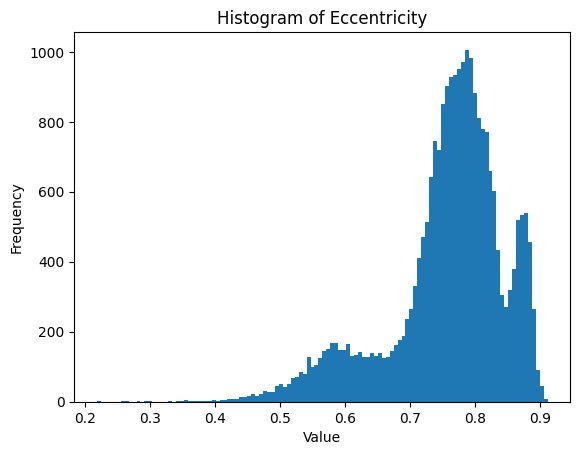

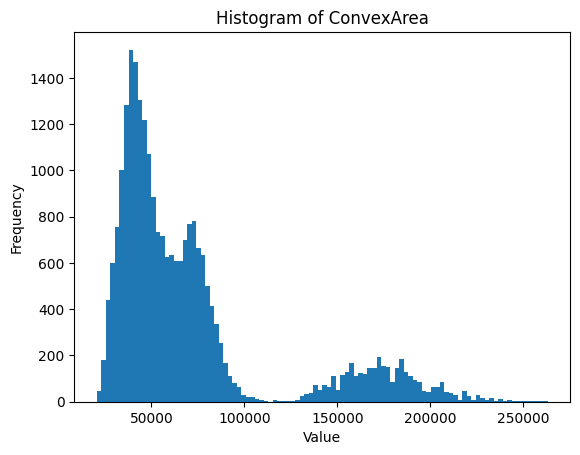

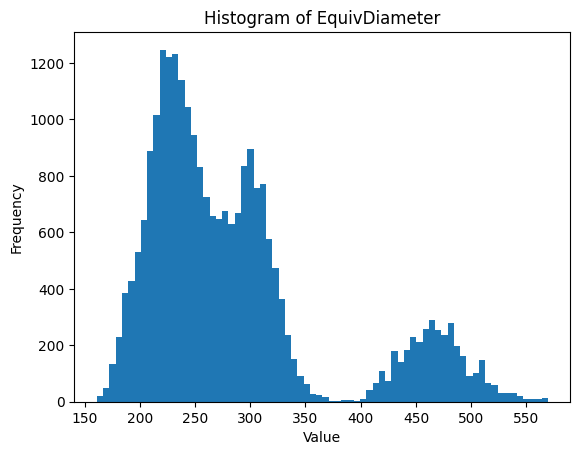

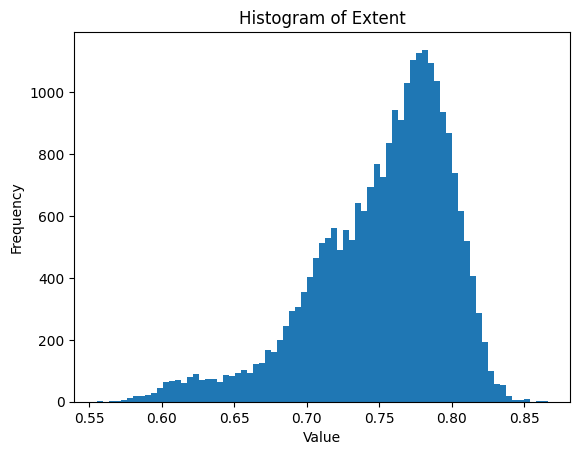

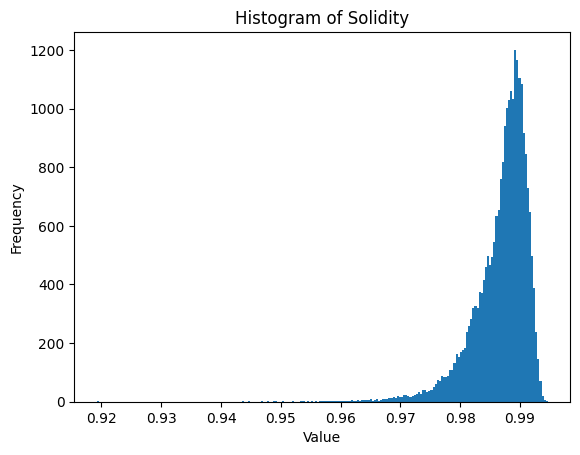

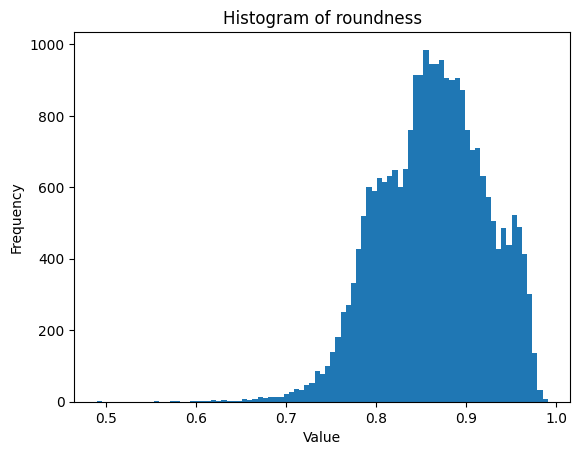

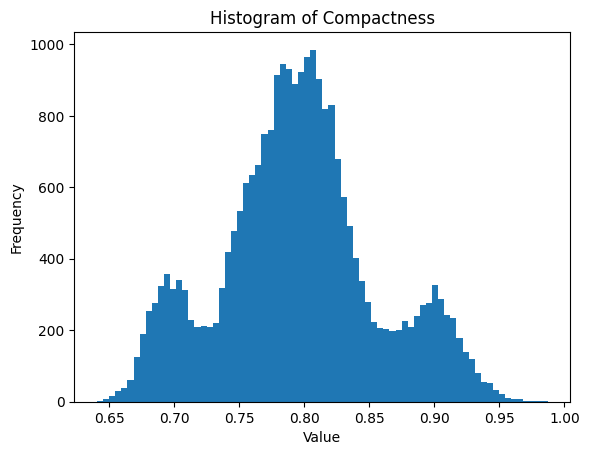

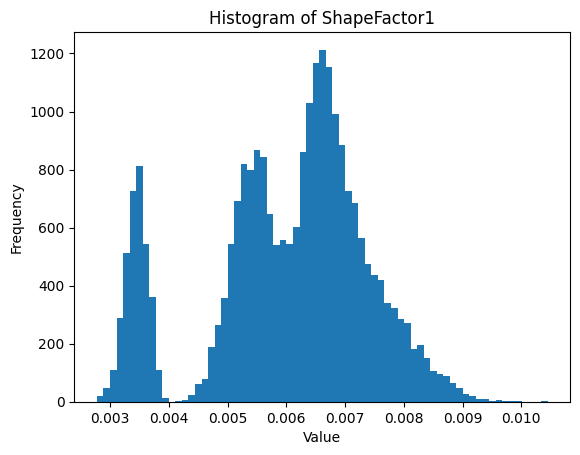

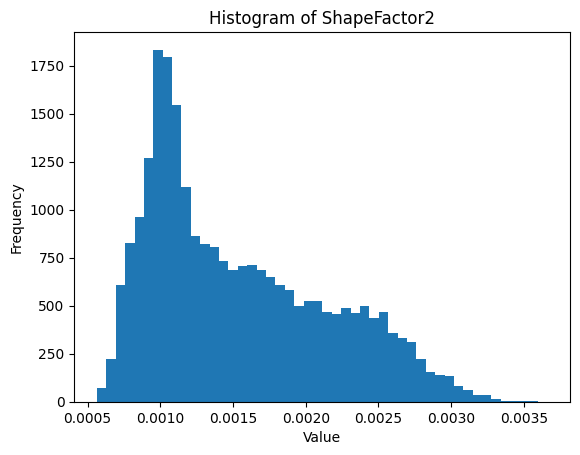

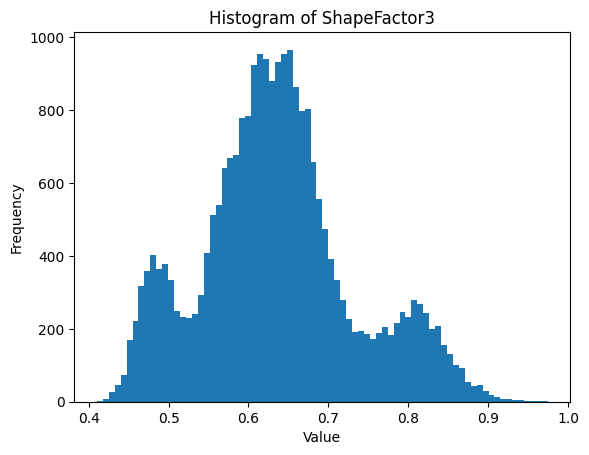

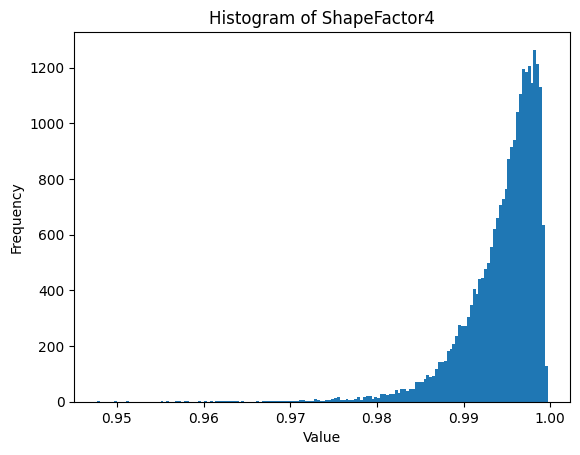

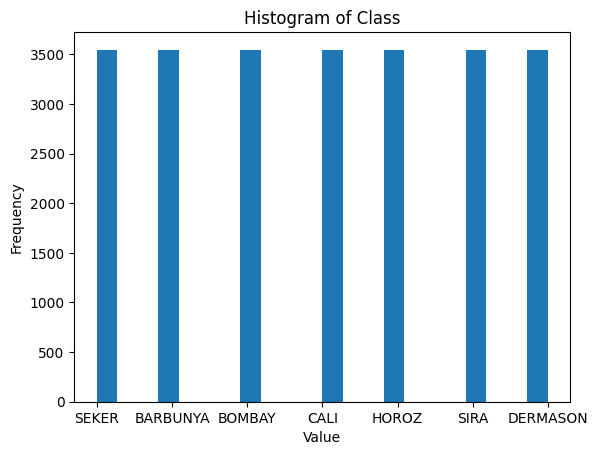

In [43]:
# Histograms to examine distribution of features
for feature in clean_data2.columns: 
    plt.hist(clean_data2[feature], bins='auto')
    plt.title("Histogram of {}".format(feature))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

#Shows most of the features exhibit non-normal distribution + outliers based on the boxplot above
#Data normalisation is necessary

In [44]:
#Re-labelling categorical features (class) as ML models require numerical variables
#Label encoding performed on the Class column --> method used to convert categorical features into numerical. Although one-hot encoding was suitable as there's no inherent hierarchy among the types of beans, this didn't prove to be practical

# Initialising encoder
encoder = LabelEncoder()
clean_data2['Class'] = encoder.fit_transform(clean_data2["Class"])

# Check the transformed dataset
clean_data2

#Noting the numerical equivalent of each class
print("Original Class label:", encoder.classes_)
print("Encoded labels:", np.unique(clean_data2['Class']))

clean_data2.head()


Original Class label: ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
Encoded labels: [0 1 2 3 4 5 6]


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


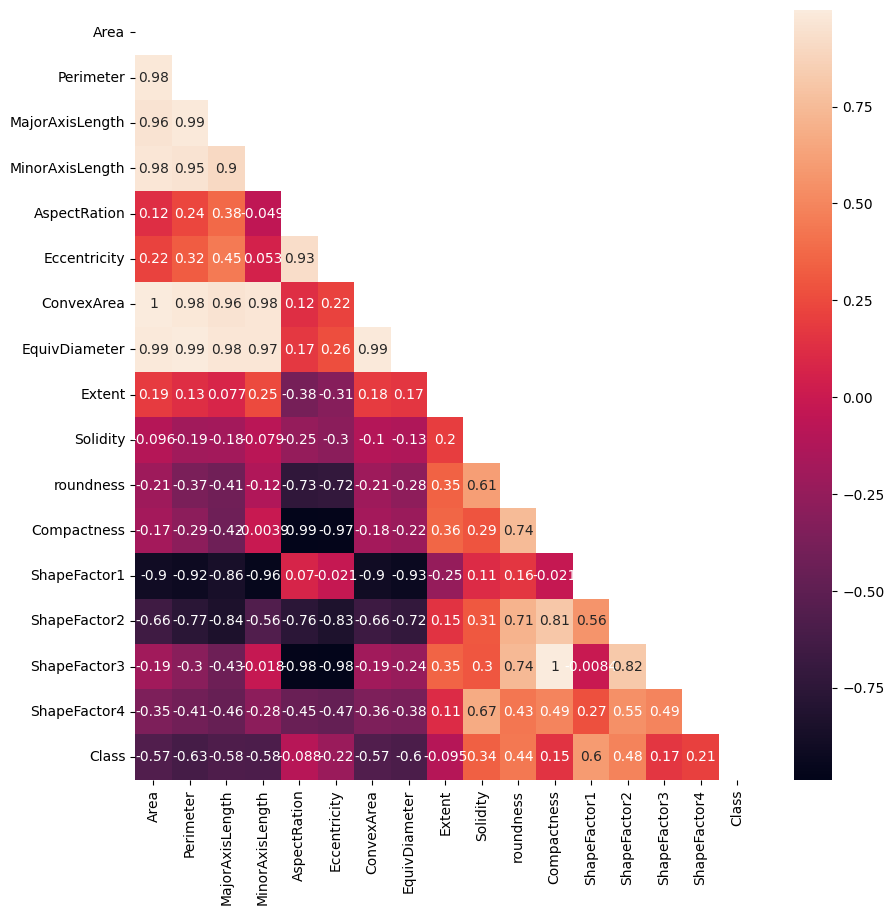

In [45]:
#Correlation plot between dry bean features
plt.figure(figsize=(10, 10))
sns.heatmap(data=clean_data2.corr(), mask=np.triu(clean_data2.corr()), annot=True)
plt.show()

#Results shows:
  #MinorAxisLength highly correlates with 3 other features, all exceeding 0.9 correlation coefficient
  #ConvexArea highly correlates with 4 other features, all exceeding 0.9
  #EquivDiameter highly correlates with 4 other features also exceeding 0.9

#We can drop MinorAxisLength, ConvexArea, EquivDiameter as these variables carry redundant information and improve accuracy + efficiency of model https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python 

In [46]:
#Removing highly correlating variables
clean_data2.drop(["MinorAxisLength", "ConvexArea", "EquivDiameter"], axis=1, inplace=True)

DATA NORMALISATION USING Z-SCORE STANDARDISATION

In [47]:
# Separate the target variable from the features
X = clean_data2.drop("Class", axis=1)
y = clean_data2["Class"]

# Initialising StandardScaler 
scaler = StandardScaler()

# Standardize the features
X_normalised = scaler.fit_transform(X)

# Create a new dataframe with the standardized features
clean_data_scaled = pd.DataFrame(X_normalised, columns=X.columns)

# Concatenate the target variable with the standardized features
clean_data_scaled = pd.concat([clean_data_scaled, y], axis=1)

SPLITTING DATASET

In [48]:
#80/20 split between train and test
training_data, testing_data = train_test_split(clean_data_scaled, test_size=0.2, random_state=260744)


#90/10 split between train and validation
training_data, validation_data = train_test_split(training_data, test_size=0.1, random_state=260744)
print(len(training_data))
print(len(validation_data))
print(len(testing_data))

17871
1986
4965


SVM MODEL TRAINING

In [49]:
#Chose SVM as it had the highest classificatiion performance according to Koklu and Ozkan 2020 research
#Training SVM model using default hyperparameters (baseline model)

# My training data + initialising x y variabkes
training_data
x_train = training_data.drop('Class', axis=1)
y_train = training_data['Class']

#training model
svm_model_1 = svm.SVC()
svm_model_1.fit(x_train, y_train)

SVC()

EVALUATING MODEL PERFORMANCE ON VALIDATION SET

In [50]:
#Initialising x and y variables for validation set
validation_data

x_valid = validation_data.drop('Class', axis=1)
y_valid = validation_data['Class']

# Predicting using validation set
y_pred = svm_model_1.predict(x_valid)

# Evaluating model's accuracy
#Precision, recall, f1-score
print(classification_report(y_valid,y_pred)) #Each rows shows the model's performance on classifying the different classes of dry beans correctly

#Confusion matrix
print(confusion_matrix(y_valid,y_pred))

#Comparing my performance against Koklu and Ozkan 2020
  #Accuracy: Higher
  #Precision: Higher
  #Recall: Higher
  #F1-score: Higher

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       308
           1       1.00      1.00      1.00       286
           2       0.97      0.96      0.96       287
           3       0.90      0.92      0.91       271
           4       0.97      0.97      0.97       290
           5       0.99      0.95      0.97       262
           6       0.86      0.89      0.88       282

    accuracy                           0.95      1986
   macro avg       0.95      0.95      0.95      1986
weighted avg       0.95      0.95      0.95      1986

[[296   0   6   0   1   0   5]
 [  0 286   0   0   0   0   0]
 [  6   0 275   0   2   0   4]
 [  0   0   0 248   0   2  21]
 [  0   0   3   1 281   0   5]
 [  2   0   0   5   1 249   5]
 [  1   0   0  23   6   1 251]]


Optimising SVM hyperparameters using training set

In [51]:
#Using GridSearchCV as it evaluates all combincations of hyperparameters 

c_values = np.logspace(0.1,1,10)
gamma_values = np.logspace(0.1,1,10)

#1. Defining grid search
grid_param = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf','poly','sigmoid'], 'gamma': ['scale', 'auto']}

#2.Creating another SVM model with tuned hyperparameter
svm_model_2 = SVC()

grid_search=GridSearchCV(estimator=svm_model_2,
                        param_grid=grid_param,
                        cv=10, #number of cross-validation set
                        n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

print('Optimal hyperparameters to be used:', grid_search.best_params_)

Optimal hyperparameters to be used: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [52]:
#Optimised SVM model trained on a combination of training and validation set (unseen data)
  #Combining training and validation
x_train 
y_train
x_valid 
y_valid

x_train_valid = np.concatenate((x_train, x_valid), axis=0)
y_train_valid = np.concatenate((y_train, y_valid), axis=0)

#Training model on training + validation set
optimised_model=SVC(C=10,kernel='rbf', gamma="scale")
optimised_model.fit(x_train_valid,y_train_valid)

SVC(C=10)

In [53]:
# My testing data + initialising x y variabkes
testing_data
x_test = testing_data.drop('Class', axis=1)
y_test = testing_data['Class']


#Evaluating performance of optimised model on testing set
y_pred2 = optimised_model.predict(x_test)


# Evaluating final model's performance
#Precision, recall, f1-score
print(classification_report(y_test,y_pred2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       734
           1       1.00      1.00      1.00       711
           2       0.96      0.97      0.96       695
           3       0.92      0.91      0.91       719
           4       0.97      0.96      0.97       690
           5       0.96      0.95      0.96       710
           6       0.87      0.91      0.89       706

    accuracy                           0.95      4965
   macro avg       0.95      0.95      0.95      4965
weighted avg       0.95      0.95      0.95      4965



EXTRA TASK - Developing and evaluating an additional solution

In [54]:
#TRAINING DT 

#Initialising DT classifier
dt_model1 = DecisionTreeClassifier(random_state = 260744)

#training model using default hyperparameters (baseline model)
dt_model1.fit(x_train, y_train)

DecisionTreeClassifier(random_state=260744)

In [55]:
#evaluating performance on validation set
y_pred_dt1 = dt_model1.predict(x_valid)

# Evaluating model's accuracy: Precision, recall, f1-score
print(classification_report(y_valid,y_pred_dt1))

#Confusion matrix
print(confusion_matrix(y_valid,y_pred_dt1))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       308
           1       1.00      1.00      1.00       286
           2       0.91      0.92      0.92       287
           3       0.86      0.87      0.87       271
           4       0.94      0.95      0.95       290
           5       0.95      0.95      0.95       262
           6       0.86      0.85      0.85       282

    accuracy                           0.92      1986
   macro avg       0.92      0.92      0.92      1986
weighted avg       0.92      0.92      0.92      1986

[[287   0  14   0   2   4   1]
 [  0 286   0   0   0   0   0]
 [ 15   0 265   0   4   0   3]
 [  0   0   0 235   3   5  28]
 [  2   0   8   1 275   0   4]
 [  1   0   1   8   0 248   4]
 [  2   0   2  28   8   3 239]]


In [56]:
#OPTIMISING MODEL - using GridSearchCV on training data

grid_param_dt = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'max_features': [None,'log2', 'sqrt']}

optimal_param = GridSearchCV(estimator=dt_model1, param_grid=grid_param_dt, cv=10)
optimal_param.fit(x_train, y_train)
print('Optimal hyperparameters to be used:', optimal_param.best_params_)

Optimal hyperparameters to be used: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [57]:
#Optimised DT model trained on a combination of training and validation set (unseen data)
  #Combining training and validation
optimised_dt_model=DecisionTreeClassifier(criterion = "entropy", max_depth = 10, max_features = None, min_samples_leaf = 1, min_samples_split = 2)
optimised_dt_model.fit(x_train_valid,y_train_valid)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [58]:
#Evaluating DT model on test set

y_pred_dt2 = optimised_dt_model.predict(x_test)

#Precision, recall, f1-score
print(classification_report(y_test,y_pred_dt2))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       734
           1       1.00      1.00      1.00       711
           2       0.94      0.97      0.95       695
           3       0.92      0.87      0.89       719
           4       0.96      0.94      0.95       690
           5       0.96      0.95      0.95       710
           6       0.83      0.91      0.87       706

    accuracy                           0.94      4965
   macro avg       0.94      0.94      0.94      4965
weighted avg       0.94      0.94      0.94      4965



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [59]:
#Adding ID column to testing_data
testing_data

# Using index number of testing_data as values for ID column 
testing_data2 = testing_data.reset_index().rename(columns={'index': 'ID'})
testing_data2.head()

,ID,Area,Perimeter,MajorAxisLength,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,11490,-0.848696,-1.070845,-1.047404,-0.388374,-0.104030,-0.337566,0.326525,0.718299,0.316633,1.368148,0.980307,0.279189,1.042328,3
1,18630,2.604907,2.429626,2.479066,0.473999,0.613604,-1.516976,-0.950075,-0.477313,-0.589848,-1.899500,-1.363154,-0.610111,-1.217140,1
2,9663,-0.430963,-0.393770,-0.258644,0.538217,0.659600,-0.428631,-0.037366,-0.036269,-0.636799,0.478278,-0.309894,-0.655489,-0.775690,6
3,11482,-0.849373,-1.094788,-1.064371,-0.494849,-0.220656,-0.231392,0.519908,1.041317,0.417611,1.327982,1.061336,0.382210,0.508017,3
4,21113,-0.489593,-0.412361,-0.250957,1.004844,0.921373,0.453256,0.516003,-0.643659,-1.005685,0.768674,-0.441478,-0.997451,-0.149813,4


In [61]:
#Best model: SVM --> Creating CSV file of SVM model prediction on testing data
testing_data

#Array of predicted results
y_pred2 = optimised_model.predict(x_test)
#Converting array into pandaframe
y_pred2_pd = pd.DataFrame(y_pred2,columns=['Predicted Class'])
predicted_class = y_pred2_pd['Predicted Class']
#Obtaining ID column of testing_data
ID_col = testing_data2['ID']
#Concatinating ID column and predicted class together
model_output = pd.concat([ID_col, y_pred2_pd], axis=1)
model_output

#Converting predicted labels from label encoding to original class names
#BARBUNYA = 0
#BOMBAY = 1
#CALI = 2
#DERMASON = 3
#HOROZ = 4
#SEKER = 5
#SIRA = 6

model_output['Predicted Class'] = model_output['Predicted Class'].replace(0, 'BARBUNYA')
model_output['Predicted Class'] = model_output['Predicted Class'].replace(1, 'BOMBAY')
model_output['Predicted Class'] = model_output['Predicted Class'].replace(2, 'CALI')
model_output['Predicted Class'] = model_output['Predicted Class'].replace(3, 'DERMASON')
model_output['Predicted Class'] = model_output['Predicted Class'].replace(4, 'HOROZ')
model_output['Predicted Class'] = model_output['Predicted Class'].replace(5, 'SEKER')
model_output['Predicted Class'] = model_output['Predicted Class'].replace(6, 'SIRA')

model_output.head()

#Converting to CSV
model_output_csv = model_output.to_csv('model_output.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


,ID,Predicted Class
0,11490,DERMASON
1,18630,BOMBAY
2,9663,SIRA
3,11482,DERMASON
4,21113,HOROZ
...,...,...
4960,19920,CALI
4961,15234,BARBUNYA
4962,10970,DERMASON
4963,218,SEKER
